In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ds = pd.read_csv('Wine.csv')
ds.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Alcohol                 178 non-null float64
Malic_Acid              178 non-null float64
Ash                     178 non-null float64
Ash_Alcanity            178 non-null float64
Magnesium               178 non-null int64
Total_Phenols           178 non-null float64
Flavanoids              178 non-null float64
Nonflavanoid_Phenols    178 non-null float64
Proanthocyanins         178 non-null float64
Color_Intensity         178 non-null float64
Hue                     178 non-null float64
OD280                   178 non-null float64
Proline                 178 non-null int64
Customer_Segment        178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [7]:
X = ds.iloc[:,0:-1]

In [9]:
X.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [23]:
#choosing the right clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,15):
    Kmeans = KMeans(n_clusters = i)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)

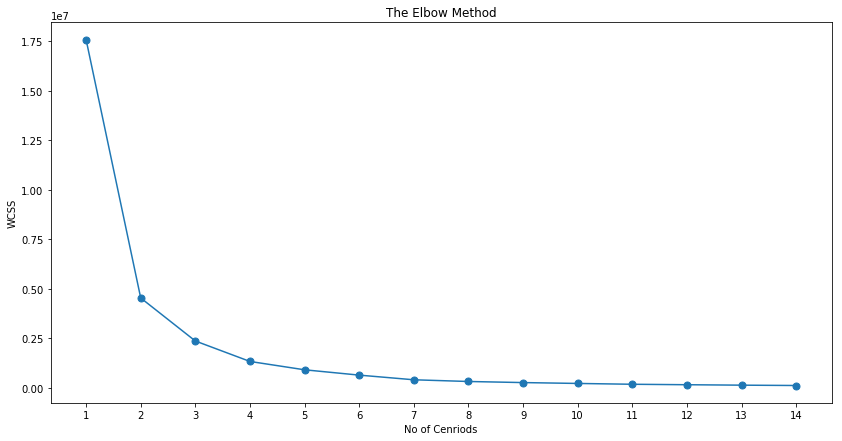

In [24]:
#visualization
width = 14
height = 7
plt.figure(figsize=(width, height))
plt.plot(range(1, 15), wcss, marker='o', markersize = 7,)
plt.xticks(range(1, 15))
plt.title('The Elbow Method')
plt.xlabel('No of Cenriods')
plt.ylabel('WCSS')

In [22]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([3, 3, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 2, 3,
       3, 2, 2, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3,
       3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 3, 0, 0, 3, 3, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 0, 0, 3, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 3, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0])

In [21]:
#visualizing the clusters
plt.scatter(X[y_kmeans ==0, 0], X[y_kmeans ==0, 1], s = 20, c = 'red', label = 'Rich')
plt.scatter(X[y_kmeans ==1, 0], X[y_kmeans ==1, 1], s = 20, c = 'blue', label = 'Average')
plt.scatter(X[y_kmeans ==2, 0], X[y_kmeans ==2, 1], s = 20, c = 'green', label = 'Target')
plt.scatter(X[y_kmeans ==3, 0], X[y_kmeans ==3, 1], s = 20, c = 'cyan', label = 'Careless Ones')
#plt.scatter(X[y_kmeans ==4, 0], X[y_kmeans ==4, 1], s = 20, c = 'magenta', label = 'Careful Poor Ones')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 50, c = 'yellow', label='centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual income')
plt.ylabel('Spending score k$')
plt.legend()

TypeError: unhashable type: 'numpy.ndarray'